In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step No 01 : Undurstand the Business problem

# Step No 02 : Undurstand the data

In [24]:
# loading the data
path='/content/drive/MyDrive/01 Data Science with Python ML deep learning/Project 03 : EDA Fifa foodball/fifa_eda.csv'
df = pd.read_csv(path)

In [25]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


ID :  unique id of all football players

Name : Name of all Players

Age : Age of indivisual player

Nationality : Nationality of indivisual player

Overall :  overall score of player

Potential : Player potential

Club :  club which he belongs

Value : is the player amount on the skills

Wage : in this example, the wages will actually refer to the total amount that the club pays all of their players.

Preferred Foot : which foot preferred for move left or write

International Reputation : score out of 5

Skill Moves : perfect move

Position : position on the ground

Joined : year of join

Contract Valid Until : contract of player which he can play

Height : player H
       
Weight : player W

Release Clause :a set fee agreed upon when a player signs a contract with a club, allowing another club to sign that player if the fee is met.

# Step No 03 : Data Preprocessing
1. data cleaning
2. data wrangling
3. featurs selection
4. Data visialization

In [26]:
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [27]:
df.shape

(18207, 18)

Clean all data where missing values in the dataset

In [28]:
df['Skill Moves'].fillna(df['Skill Moves'].mode()[0], inplace=True)
df['International Reputation'].fillna(df['International Reputation'].mode()[0], inplace=True)
df['Value'].fillna(df['Value'].mean(), inplace=True)
df['Contract Valid Until'].fillna(df['Contract Valid Until'].mode()[0], inplace=True)
df['Club'].fillna(0, inplace=True)

In [29]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


Data Wrangling for machine Learning where we have selected for left foot =0 and right leg ==1

In [30]:
df['Preferred Foot'] = df['Preferred Foot'].map({'Left': 0, 'Right': 1})

In [31]:
df.groupby('Nationality')['Skill Moves'].max()

Nationality
Afghanistan    3.0
Albania        3.0
Algeria        5.0
Andorra        2.0
Angola         4.0
              ... 
Uzbekistan     3.0
Venezuela      4.0
Wales          4.0
Zambia         3.0
Zimbabwe       4.0
Name: Skill Moves, Length: 164, dtype: float64

In [32]:
df[df['Skill Moves']==5]['Nationality']

1                   Portugal
2                     Brazil
25                    France
32                    Brazil
35                    Brazil
45                    France
65                    Brazil
67                     Spain
84                   Algeria
109                   Sweden
124              Netherlands
129                 Colombia
138                Argentina
153                 Portugal
164                   France
170              Netherlands
221                   France
233                 Portugal
243                    Italy
270              Ivory Coast
288                  Ukraine
370              Switzerland
371                   Mexico
376                    Italy
408                 Portugal
480                 Cameroon
524                Argentina
545                    Spain
557                   Brazil
559                  Morocco
582                Argentina
711                   France
1004                 England
1132               Argentina
1143          

In [79]:
df.groupby('Nationality').sum()

<ipython-input-79-dc3f31285187>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Nationality').sum()


,ID,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
Nationality,,,,,,,,,,,,,
Afghanistan,938974,90,244,271,1370.000000,5.0,3,4.0,10.0,8069,22.916667,597.000000,2469.000000
Albania,8867298,961,2637,2868,76810.000000,284.0,31,44.0,99.0,80641,238.030104,6576.979129,147761.182419
Algeria,12381343,1623,4238,4379,280255.000000,1085.0,40,78.0,169.0,121015,356.833333,10035.000000,509401.243225
Andorra,192937,28,62,64,290.000000,1.0,1,1.0,2.0,2018,6.000000,174.000000,384.000000
Angola,3100140,388,1014,1073,30275.000000,115.0,12,17.0,44.0,30255,88.166667,2498.000000,54356.121613
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,379170,59,135,135,6200.000000,18.0,2,2.0,5.0,4034,11.916667,328.000000,13450.000000
Venezuela,15066936,1629,4507,4901,167011.711501,415.0,56,74.0,169.0,135147,394.946771,11032.979129,281614.912095
Wales,26018094,3191,8274,9026,228909.530214,1560.0,101,141.0,290.0,260089,768.916667,21466.000000,479153.790482


<ipython-input-77-bd1dfa66b1df>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_Clause = df.groupby('Nationality').sum().sort_values('Release Clause', ascending = False).head(20)


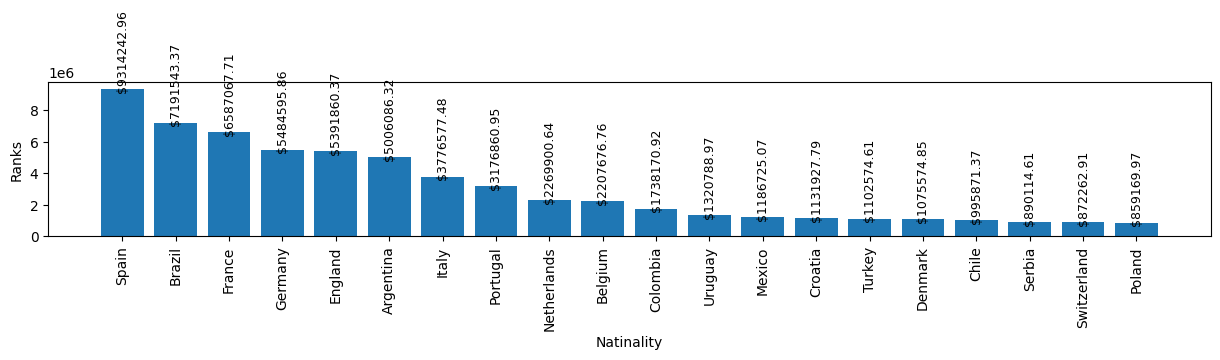

In [77]:
country_Clause = df.groupby('Nationality').sum().sort_values('Release Clause', ascending = False).head(20)
country_Clause = country_Clause[['Release Clause']].round(2)

country_Clause.reset_index(inplace=True)
plt.figure(figsize=(15,2))
plt.xlabel('Natinality')
plt.ylabel('Ranks')
plt.xticks(fontsize = 10, rotation =90)
plt.bar(country_Clause['Nationality'],country_Clause['Release Clause'])

for k,v in country_Clause["Release Clause"].items():
    if v>8:
        plt.text(k,v-1,'$'+ str(v), fontsize=9,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v-2,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

plt.show()